In [29]:
import numpy as np
import pandas as pd
import translators as ts
from multiprocessing import Pool
from tqdm import *

In [30]:
# load original data
data = pd.read_table("../datasets/task_a/transliterated/kan_train_trans.tsv")

In [31]:
data.reset_index(inplace=True)

In [39]:
data['text_trans']


0       ondu deshad munduvariyuvudu ader aarthik state...
1       kannadadalli daily tech apdates padeyalu sabsq...
2                                          Super sar song
3       Tiktokers present situation... nnoduvavaru yaa...
4                               Super san verry naise....
                              ...                        
6207    @A.R.W   tumbad tanhaji andhadhun aise bahot h...
6208                    പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്
6209    Bro...nNeen este Roast madudru...China ne beku...
6210    kaushalya iddavar sankhye kadime ill sar tumba...
6211                                           26 M Views
Name: text_trans, Length: 6212, dtype: object

<AxesSubplot:title={'center':'Number of Tweets by Category'}, xlabel='category'>

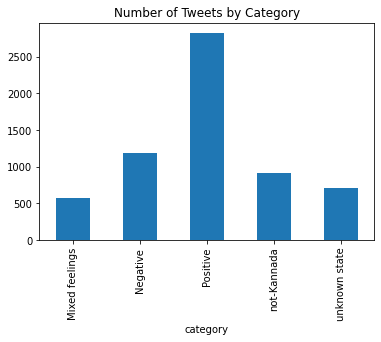

In [23]:
data.groupby('category').text_trans.count().plot.bar(title='Number of Tweets by Category')

In [37]:
LANG = 'en'
API = 'google'


def translator_constructor(api):
    if api == 'google':
        return ts.google
    elif api == 'bing':
        return ts.bing
    elif api == 'baidu':
        return ts.baidu
    elif api == 'sogou':
        return ts.sogou
    elif api == 'youdao':
        return ts.youdao
    elif api == 'tencent':
        return ts.tencent
    elif api == 'alibaba':
        return ts.alibaba
    else:
        raise NotImplementedError(f'{api} translator is not realised!')


def translate(x):
    try:
        return [x.iloc[0], translator_constructor(API)(x.iloc[1], 'kan', LANG), x.iloc[2]]
    except:
        return [x[0], None, [2]]


In [38]:
translate(data)

KeyError: 0